In [34]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [36]:
data = pd.read_csv('albumlist.csv',encoding = "ISO-8859-1", header = None) #encoding = "ISO-8859-1"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       501 non-null    object
 1   1       501 non-null    object
 2   2       501 non-null    object
 3   3       501 non-null    object
 4   4       501 non-null    object
 5   5       501 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [37]:
data.head()

,0,1,2,3,4,5
0,Number,Year,Album,Artist,Genre,Subgenre
1,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
2,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
3,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
4,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"


In [38]:

transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [39]:
transactions[:1]

[['Number', 'Year', 'Album', 'Artist', 'Genre', 'Subgenre']]

In [40]:

from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)


onehot = encoder.transform(transactions)


onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('None', axis=1) #drop('NaM', axis=1) #.drop('None', axis=1)


onehot.head()

,"""Love and Theft""",#1 Record,(What's the Story) Morning Glory?,(pronounced 'leh-'nerd 'skin-'nerd),1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,12 Songs,120,121,122,123,124,125,126,127,...,Vampire Weekend,Van Halen,Van Morrison,Various,Various Artists,Violator,Vitalogy,Vocal,"Vocal, Easy Listening",Volunteers,Voodoo,War,We're Only in It for the Money,Weezer,Weezer (Blue Album),What's Going On,"Whatever People Say I Am, That's What I'm Not",Wheels of Fire,White Blood Cells,White Light/White Heat,Whitney Houston,Who's Next,Wilco,Wild Gift,Willie Nelson,Willy and the Poor Boys,Wire,Wish You Were Here,Workingman's Dead,Wu Tang Clan,X,Yankee Hotel Foxtrot,Year,Younger Than Yesterday,Z,ZZ Top,[Led Zeppelin IV]
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['confidence']).sort_values('confidence',ascending=False)



In [42]:
from mlxtend.frequent_patterns import apriori

mincon=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
elaptime=[]
lenres=[]

for confid in mincon:
    t0= time.time()
    result = apriori(onehot, min_support = 0.01, use_colnames = True)
    result = association_rules(result, metric = "confidence", min_threshold = confid)
    print(len(result))
    t1 = time.time()
    print("Time elapsed: ", t1 - t0)
    elaptime.append(t1-t0)
    lenres.append(len(result))
print(elaptime)
print(lenres)


results1 = apriori(onehot, min_support = 0.01, use_colnames = True)
results1 = association_rules(results1, metric = "confidence", min_threshold = 0.001)
# Print a preview of the frequent itemsets
results1 = pd.DataFrame(results1 ).sort_values('support',ascending=False)


results1.head()




13
Time elapsed:  0.06522488594055176
12
Time elapsed:  0.06324005126953125
10
Time elapsed:  0.06197047233581543
9
Time elapsed:  0.06371903419494629
9
Time elapsed:  0.07122206687927246
5
Time elapsed:  0.06870126724243164
[0.06522488594055176, 0.06324005126953125, 0.06197047233581543, 0.06371903419494629, 0.07122206687927246, 0.06870126724243164]
[13, 12, 10, 9, 9, 5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(Rock),(Pop Rock),0.497006,0.043912,0.039920,0.080321,1.829135,0.018096,1.039589
50,(Pop Rock),(Rock),0.043912,0.497006,0.039920,0.909091,1.829135,0.018096,5.532934
8,(1970),(Rock),0.051896,0.497006,0.031936,0.615385,1.238184,0.006143,1.307784
17,(Rock),(1973),0.497006,0.045908,0.031936,0.064257,1.399686,0.009119,1.019609
9,(Rock),(1970),0.497006,0.051896,0.031936,0.064257,1.238184,0.006143,1.013210


In [43]:
forplot=[]
for i in mincon:
  forplot.append(str(i))

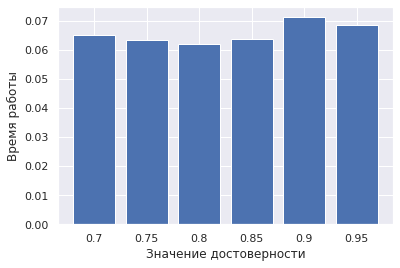

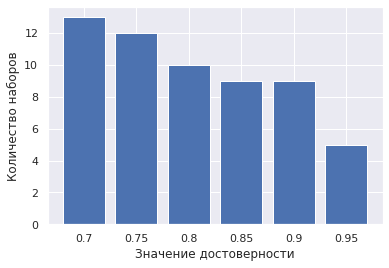

In [44]:
plt.bar(forplot, elaptime)
plt.xlabel("Значение достоверности")
plt.ylabel("Время работы")
plt.show()

plt.bar(forplot, lenres)
plt.xlabel("Значение достоверности")
plt.ylabel("Количество наборов")
plt.show()